In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# import cleaned datasets
ma_35 = pd.read_csv('Data/Cleaned_MA35.csv')
ma_39 = pd.read_csv('Data/Cleaned_MA39.csv')

In [3]:
# feature engineering: 7-day rolling averages, 1-day lagged data, and temporal features
def add_features(df):
    df['date'] = pd.to_datetime(df['date'])
    df['prcp_7day'] = df['prcp'].rolling(7).mean()
    df['t_7day'] = df['t_median'].rolling(7).mean()
    df['prcp_lag'] = df['prcp'].shift(1)
    df['t_lag'] = df['t_median'].shift(1)
    
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofyear'] = df['date'].dt.dayofyear
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['dayofyear_sin'] = np.sin(2 * np.pi * df['dayofyear'] / 365)
    df['dayofyear_cos'] = np.cos(2 * np.pi * df['dayofyear'] / 365)
    
    df = df.dropna(axis=0)
    df = df.drop(columns=['date'])
    return df

In [4]:
ma_35 = add_features(ma_35)
ma_35 = ma_35[ma_35['year'] != 2025]
# ma_35.info()

In [5]:
ma_39 = add_features(ma_39)
ma_39 = ma_39[ma_39['year'] != 2025]
# ma_39.info()

## MA35 random forest


In [6]:
# Split data into training (before 2024) and testing (2024 only)
train_df = ma_35[ma_35['year'] < 2024]
test_df = ma_35[ma_35['year'] == 2024]

# Define features and target
X_train = train_df.drop(columns=['gwl_median', 'gwl_hr'])
y_train = train_df['gwl_median']
X_test = test_df.drop(columns=['gwl_median', 'gwl_hr'])
y_test = test_df['gwl_median']

In [7]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=20, random_state=30)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Absolute Error: 1.6011755464480875
Mean Squared Error: 3.3241718594603835
R-squared Score: -1.4392774383881282


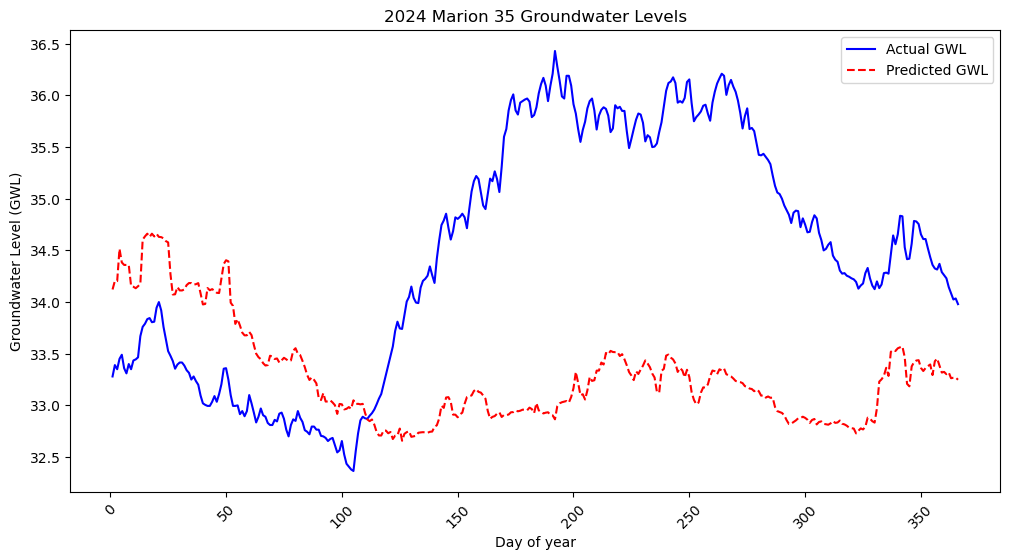

In [8]:
# Plot historical and predicted groundwater levels
plt.figure(figsize=(12, 6))
plt.plot(test_df['dayofyear'], y_test, label='Actual GWL', color='blue')
plt.plot(test_df['dayofyear'], y_pred, label='Predicted GWL', color='red', linestyle='dashed')
plt.xlabel('Day of year')
plt.ylabel('Groundwater Level (GWL)')
plt.title('2024 Marion 35 Groundwater Levels')
plt.legend()
plt.xticks(rotation=45)
plt.show()

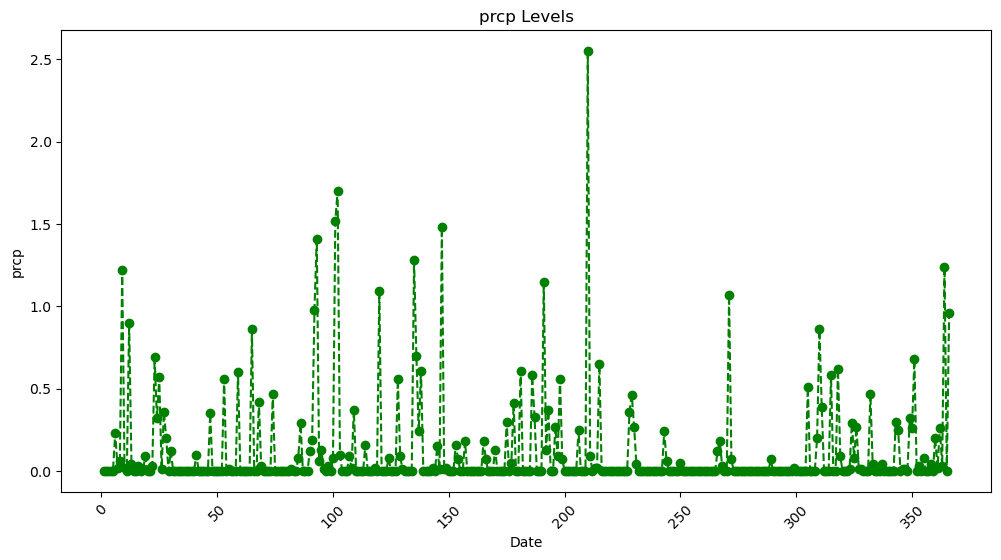

In [9]:
# Plot historical and predicted groundwater levels
plt.figure(figsize=(12, 6))
plt.plot(test_df['dayofyear'], test_df['prcp'], label='prcp', color='green', marker='o', linestyle='dashed')
# plt.plot(test_df['date'], test_df['t_median'], label='Predicted GWL', color='red', marker='x', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('prcp')
plt.title('prcp Levels')
#plt.legend()
plt.xticks(rotation=45)
plt.show()

## MA39 random forest


In [10]:
# Split data into training (before 2024) and testing (2024 only)
train_df = ma_39[ma_39['year'] < 2024]
test_df = ma_39[ma_39['year'] == 2024]

# Define features and target
X_train = train_df.drop(columns=['gwl_median'])
y_train = train_df['gwl_median']
X_test = test_df.drop(columns=['gwl_median'])
y_test = test_df['gwl_median']

In [11]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=20, random_state=30)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Absolute Error: 0.6808485842766069
Mean Squared Error: 0.8675007064847301
R-squared Score: 0.6668143664218815


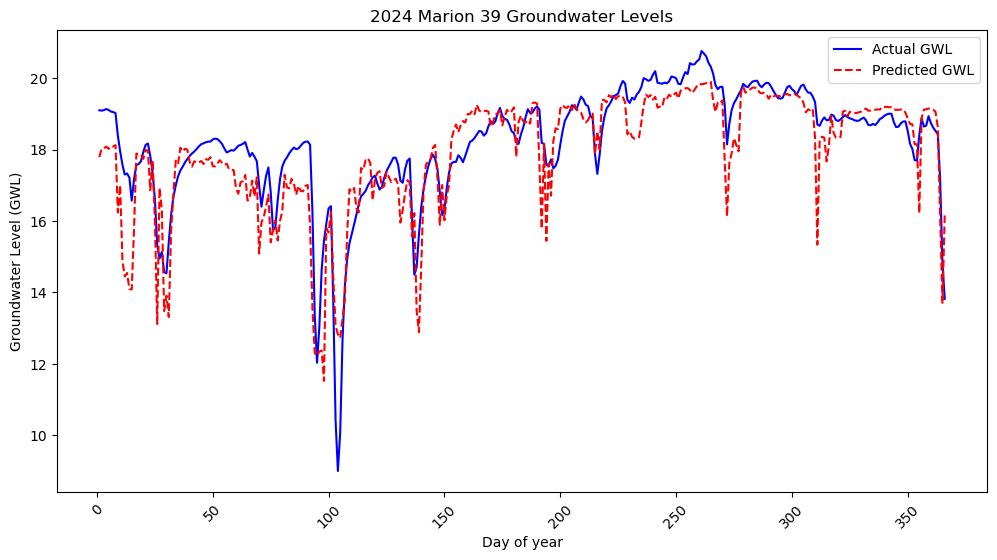

In [12]:
# Plot historical and predicted groundwater levels
plt.figure(figsize=(12, 6))
plt.plot(test_df['dayofyear'], y_test, label='Actual GWL', color='blue')
plt.plot(test_df['dayofyear'], y_pred, label='Predicted GWL', color='red', linestyle='dashed')
plt.xlabel('Day of year')
plt.ylabel('Groundwater Level (GWL)')
plt.title('2024 Marion 39 Groundwater Levels')
plt.legend()
plt.xticks(rotation=45)
plt.show()

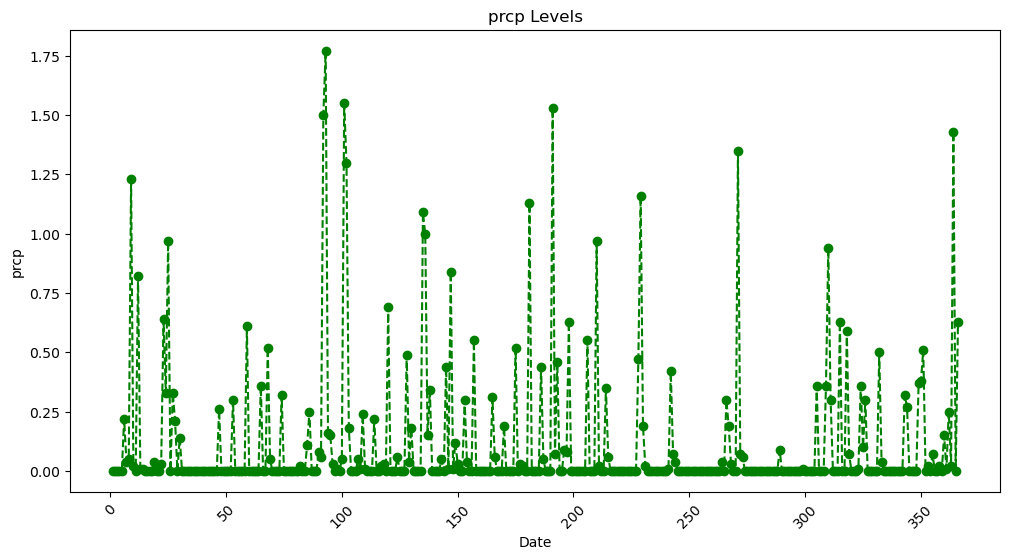

In [13]:
# Plot historical and predicted groundwater levels
plt.figure(figsize=(12, 6))
plt.plot(test_df['dayofyear'], test_df['prcp'], label='prcp', color='green', marker='o', linestyle='dashed')
# plt.plot(test_df['date'], test_df['t_median'], label='Predicted GWL', color='red', marker='x', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('prcp')
plt.title('prcp Levels')
#plt.legend()
plt.xticks(rotation=45)
plt.show()

## Random Forest on dynamic MA_35 and MA_39

In [14]:
ma_35 = pd.read_csv('Data/Dynamic_MA35.csv')
ma_39 = pd.read_csv('Data/Dynamic_MA39.csv')

In [15]:
ma_35 = add_features(ma_35)
ma_35 = ma_35[ma_35['year'] != 2025]
# ma_35.info()

In [16]:
ma_39 = add_features(ma_39)
ma_39 = ma_39[ma_39['year'] != 2025]
# ma_35.info()

In [17]:
# Split data into training (before 2024) and testing (2024 only)
train_df = ma_35[ma_35['year'] < 2024]
test_df = ma_35[ma_35['year'] == 2024]

# Define features and target
X_train = train_df.drop(columns=['gwl_median'])
y_train = train_df['gwl_median']
X_test = test_df.drop(columns=['gwl_median'])
y_test = test_df['gwl_median']

In [18]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=20, random_state=30)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Absolute Error: 1.602092105263158
Mean Squared Error: 3.320053953774238
R-squared Score: -1.4471439612053913


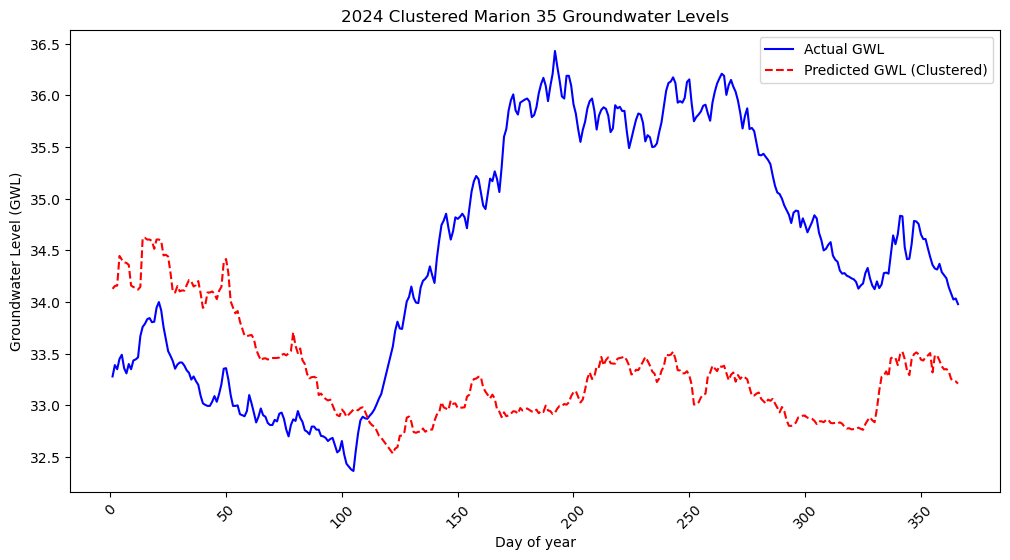

In [19]:
# Plot historical and predicted groundwater levels
plt.figure(figsize=(12, 6))
plt.plot(test_df['dayofyear'], y_test, label='Actual GWL', color='blue')
plt.plot(test_df['dayofyear'], y_pred, label='Predicted GWL (Clustered)', color='red', linestyle='dashed')
plt.xlabel('Day of year')
plt.ylabel('Groundwater Level (GWL)')
plt.title('2024 Clustered Marion 35 Groundwater Levels')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [20]:
# Split data into training (before 2024) and testing (2024 only)
train_df = ma_39[ma_39['year'] < 2024]
test_df = ma_39[ma_39['year'] == 2024]

# Define features and target
X_train = train_df.drop(columns=['gwl_median'])
y_train = train_df['gwl_median']
X_test = test_df.drop(columns=['gwl_median'])
y_test = test_df['gwl_median']

In [21]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=20, random_state=30)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Absolute Error: 0.6926600274725272
Mean Squared Error: 0.8769284177541207
R-squared Score: 0.6419819240812947


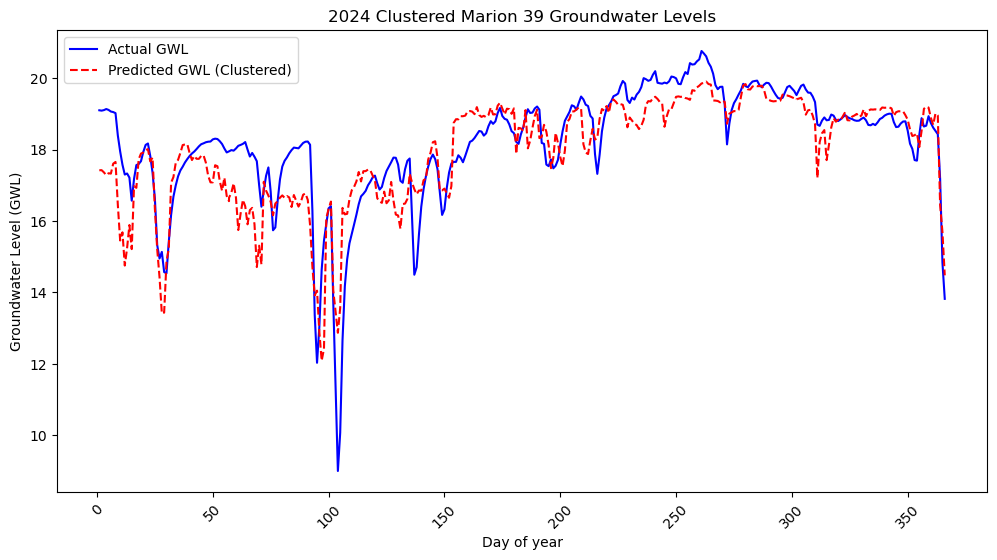

In [22]:
# Plot historical and predicted groundwater levels
plt.figure(figsize=(12, 6))
plt.plot(test_df['dayofyear'], y_test, label='Actual GWL', color='blue')
plt.plot(test_df['dayofyear'], y_pred, label='Predicted GWL (Clustered)', color='red', linestyle='dashed')
plt.xlabel('Day of year')
plt.ylabel('Groundwater Level (GWL)')
plt.title('2024 Clustered Marion 39 Groundwater Levels')
plt.legend()
plt.xticks(rotation=45)
plt.show()